# AB TESTING
## BY DWI SMARADAHANA INDRALOKA
***

## Import library

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

## Upload Dataset (Udacity Dataset)

In [2]:
data = pd.read_csv("homepage_actions.csv")
data.head()

,date,id,group,action
0,9/24/2016,804196,experiment,view
1,9/24/2016,434745,experiment,view
2,9/24/2016,507599,experiment,view
3,9/24/2016,671993,control,view
4,9/24/2016,536734,experiment,view


In [3]:
data.isna().sum()

date      0
id        0
group     0
action    0
dtype: int64

## Separate Experiment Dataset and Control Dataset

## 1. Experiment Dataset
* Step: Take data with the column "group" that equals to "experiment"

In [4]:
data_exp = data[data["group"] == "experiment"]
data_exp.head()

,date,id,group,action
0,9/24/2016,804196,experiment,view
1,9/24/2016,434745,experiment,view
2,9/24/2016,507599,experiment,view
4,9/24/2016,536734,experiment,view
5,9/24/2016,681598,experiment,view


### 1.1 Count the Number of View Based on Date
* Step 1: Take experiment data with the column "action" that equals to "view"
* Step 2: Grouping the data based on "date" and count the number of "action"
* Step 2: rename column "action" to "view"

In [5]:
data_view = data_exp[data_exp["action"] == "view"]
data_view = data_view[["action","date"]].groupby(["date"]).count()
data_view = data_view.rename(columns = {"action":"view"})
data_view.head()

,view
date,
1/1/2017,22
1/10/2017,27
1/11/2017,28
1/12/2017,25
1/13/2017,27


### 1.2 Count the Number of Click Based on Date
* Step 1: Take experiment data with the column "action" that equals to "click"
* Step 2: Grouping the data based on "date" and count the number of "action"
* Step 2: rename column "action" to "click"

In [6]:
data_click = data_exp[data_exp["action"] == "click"]
data_click = data_click[["action","date"]].groupby(["date"]).count()
data_click = data_click.rename(columns = {"action":"click"})
data_click.head()

,click
date,
1/1/2017,11
1/10/2017,7
1/11/2017,6
1/12/2017,6
1/13/2017,11


### 1.3 Experiment Dataset with Number of View and Number of Click
* Step: Join number of view data with number of click data using the outer method

In [7]:
data_exp1 = pd.merge(data_view, data_click, how = "outer", on = "date")
data_exp1.head()

,view,click
date,,
1/1/2017,22,11
1/10/2017,27,7
1/11/2017,28,6
1/12/2017,25,6
1/13/2017,27,11


In [8]:
data_exp1 = data_exp1.fillna(0)
data_exp1.shape

(117, 2)

## 2. Control Dataset
* Step: Take data with the column "group" that equals to "control"

In [9]:
data_con = data[data["group"] == "control"]
data_con.head()

,date,id,group,action
3,9/24/2016,671993,control,view
9,9/24/2016,560027,control,view
23,9/25/2016,281985,control,view
24,9/25/2016,407864,control,view
25,9/25/2016,342984,control,view


### 2.1 Count the Number of View Based on Date
* Step 1: Take control data with the column "action" that equals to "view"
* Step 2: Grouping the data based on "date" and count the number of "action"
* Step 2: rename column "action" to "view"

In [10]:
data_view1 = data_con[data_con["action"] == "view"]
data_view1 = data_view1[["action","date"]].groupby(["date"]).count()
data_view1 = data_view1.rename(columns = {"action":"view"})
data_view1.head()

,view
date,
1/1/2017,34
1/10/2017,37
1/11/2017,38
1/12/2017,18
1/13/2017,31


### 2.2 Count the Number of Click Based on Date
* Step 1: Take control data with the column "action" that equals to "click"
* Step 2: Grouping the data based on "date" and count the number of "action"
* Step 2: rename column "action" to "click"

In [11]:
data_click1 = data_con[data_con["action"] == "click"]
data_click1 = data_click1[["action","date"]].groupby(["date"]).count()
data_click1 = data_click1.rename(columns = {"action":"click"})
data_click1.head()

,click
date,
1/1/2017,11
1/10/2017,10
1/11/2017,11
1/12/2017,7
1/13/2017,14


### 2.3 Control Dataset with Number of View and Number of Click
* Step: Join number of view data with number of click data using the outer method

In [12]:
data_con1 = pd.merge(data_view1, data_click1, how = "outer", on = "date")
data_con1.head()

,view,click
date,,
1/1/2017,34,11.0
1/10/2017,37,10.0
1/11/2017,38,11.0
1/12/2017,18,7.0
1/13/2017,31,14.0


In [13]:
data_con1 = data_con1.fillna(0)
data_con1.shape

(117, 2)

## Visualization

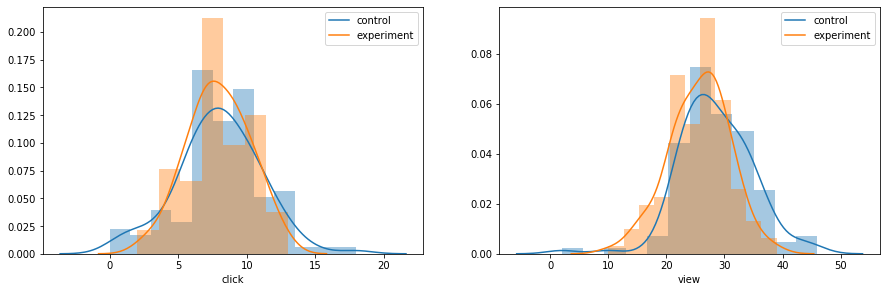

In [14]:
f = plt.figure(figsize = (15,10))
f.add_subplot(2,2,1)
sns.distplot(data_con1["click"], kde_kws = {"label" : "control"})
sns.distplot(data_exp1["click"], kde_kws = {"label" : "experiment"})

f.add_subplot(2,2,2)
sns.distplot(data_con1["view"], kde_kws = {"label" : "control"})
sns.distplot(data_exp1["view"], kde_kws = {"label" : "experiment"})

## Z-Test Using Number of Click
H0 = There is no difference between control and experiment, H1 = There is a difference between control and experiment

### 1. Calculation
* Step 1: Calculate the mean of control "click" data and experiment "click" data
* Step 2: Calculate the standard deviation of control "click" data and experiment "click" data
* Step 3: Do Z-Test
* Step 4: Evaluate the P-Value and choose the reslut for the hypothesis

In [15]:
data1_mean = np.mean(data_con1["click"])
data2_mean = np.mean(data_exp1["click"])
data1_std = np.std(data_con1["click"])
data2_std = np.std(data_exp1["click"])
ztest, pval1 = stests.ztest(data_con1["click"], x2 = data_exp1["click"], value = 0, alternative = 'two-sided')
decision1 = "reject null hypothesis"
decision2 = "accept null hypothesis"
decision = decision1 if pval1 < 0.05 else decision2

### 2. Mean and Standard Deviation Table

In [16]:
tabel = pd.DataFrame()
tabel['Data'] = ['Control', 'Experiment']
tabel['Mean'] = [data1_mean, data2_mean]
tabel['Standar_Dev'] = [data1_std, data2_std]
tabel

,Data,Mean,Standar_Dev
0,Control,7.965812,3.071600
1,Experiment,7.931624,2.297254


### 3. Z Score,  P-Value and Decision Table

In [17]:
tabel1 = pd.DataFrame()
tabel1['Z-Score'] = [ztest]
tabel1['P-Value'] = [pval1]
tabel1['Decision'] = [decision]
tabel1

,Z-Score,P-Value,Decision
0,0.095999,0.923522,accept null hypothesis


***
Based on the results above, we can see that the value of H0 is accepted, it means that there is no difference between the number of clicks activities on the website homepage in the experiment and control.
***

## Z-Test Using Number of View
H0 = There is no difference between control and experiment, H1 = There is a difference between control and experiment

### 1. Calculation
* Step 1: Calculate the mean of control "view" data and experiment "view" data
* Step 2: Calculate the standard deviation of control "view" data and experiment "view" data
* Step 3: Do Z-Test
* Step 4: Evaluate the P-Value and choose the reslut for the hypothesis

In [18]:
data1_mean = np.mean(data_con1["view"])
data2_mean = np.mean(data_exp1["view"])
data1_std = np.std(data_con1["view"])
data2_std = np.std(data_exp1["view"])
ztest, pval1 = stests.ztest(data_con1["view"], x2 = data_exp1["view"], value = 0, alternative = 'two-sided')
decision1 = "reject null hypothesis"
decision2 = "accept null hypothesis"
decision = decision1 if pval1 < 0.05 else decision2

### 2. Mean and Standard Deviation Table

In [19]:
tabel = pd.DataFrame()
tabel['Data'] = ['Control', 'Experiment']
tabel['Mean'] = [data1_mean, data2_mean]
tabel['Standar_Dev'] = [data1_std, data2_std]
tabel

,Data,Mean,Standar_Dev
0,Control,28.478632,6.292851
1,Experiment,25.606838,5.231328


### 3. Z Score,  P-Value and Decision Table

In [20]:
tabel1 = pd.DataFrame()
tabel1['Z-Score'] = [ztest]
tabel1['P-Value'] = [pval1]
tabel1['Decision'] = [decision]
tabel1

,Z-Score,P-Value,Decision
0,3.77966,0.000157,reject null hypothesis


***
Based on the results above, we can see that the value of H0 is rejected, it means that there is a difference between the number of website hompage views in the experiment and control.
***

## Conclusion

The purpose of the experiments that carried out is to see the interest of web visitors to the new look of the website hompage, where visitor interest is assessed by the number of clicks activities on the website homepage. Based on the results above, we can see that there is no difference between the number of clicks on the website homepage experiment and website homepage control, but if we look at the number of website homepage views, the number of website homepage experiment views is less than the  number of website hompage control views. It means that the website homepage experiment has higher Click Trough Rate (CTR) values because although the number of website homepage views is smaller, but it is able to get the same number of clicks activities, so we can use new look for website hompage.

***
# THANK YOU